In [8]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

True


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


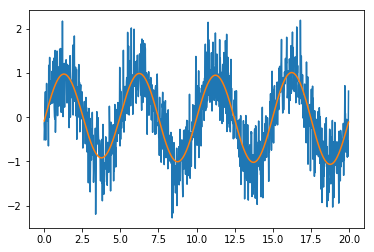

In [34]:
# 模拟信号
time_step = 0.02 # 信号采样间隔
period = 5 # 真实信号周期
time_vec = np.arange(0, 20, time_step) # 所有采样点
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size) # 生成模拟信号
plt.plot(time_vec, sig)

# FFT需要提供离散频率点
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig) # 变换

pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

main_freq = freqs[power.argmax()] # 能量最大的频率
flag = np.allclose(main_freq, 1./period) # 检查是否找到了正确的频率

if flag:
    sig_fft[np.abs(sample_freq) > main_freq] = 0
    main_sig = fftpack.ifft(sig_fft)
    plt.plot(time_vec, main_sig)
    plt.show()

In [45]:
# 通过傅里叶变换进行图像去噪
data = plt.imread("noise.png")
# 不会。。。

# 优化